## Decision Trees 

## Data dictionary: (Breast Cancer)
>Age: age of the patient (years)

>BMI: body mass index (kg/m2)

>Glucose: glucose concentration in blood (mg/dL)

>Insulin: insulin concentration in blood (microU/mL)

>HOMA: homeostatic model assessment of insulin resistance (glucose times insulin)

>Leptin: concentration of leptin - hormone of energy expenditure (ng/mL)

>Adiponectin: concentration of adiponectin - protein regulating glucose level (micro g/mL)

>Resistin: concentration of resistin - protein secreted by adipose tissue (ng/mL)

>MCP.1: concentration of MCP.1 - protein that recruits monocytes to the sites of inflammation due to tissue injure or inflammation (pg/dL)

>Classification: Healthy (1) or patient (2)

In [13]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import plot_confusion_matrix 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier

%matplotlib inline 

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/marcopeix/datasciencewithmarco/master/data/breastCancer.csv')
df.head(5)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


Counts of the target column:
1    52
2    64
Name: Classification, dtype: int64


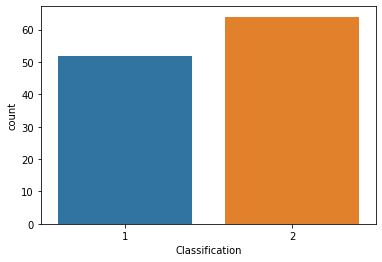

In [4]:
print(f'Counts of the target column:\n{df.Classification.value_counts(ascending = True)}')
x = df['Classification']
ax = sns.countplot(x=x, data = df)


Fairly balanced 

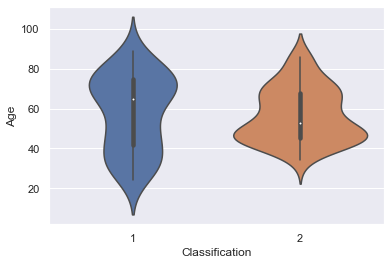

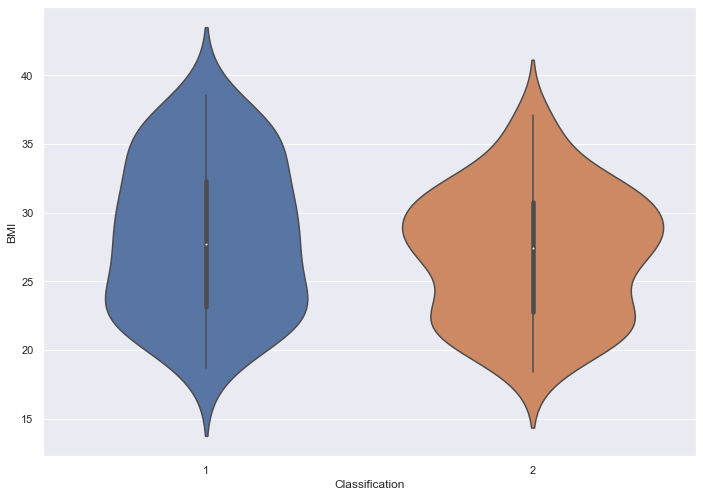

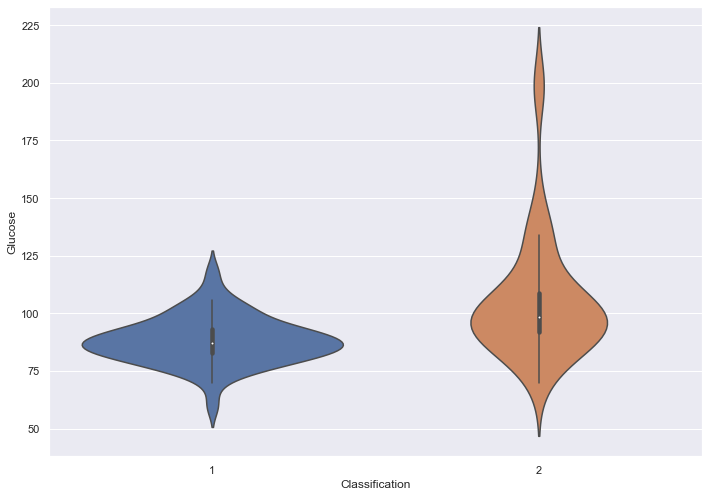

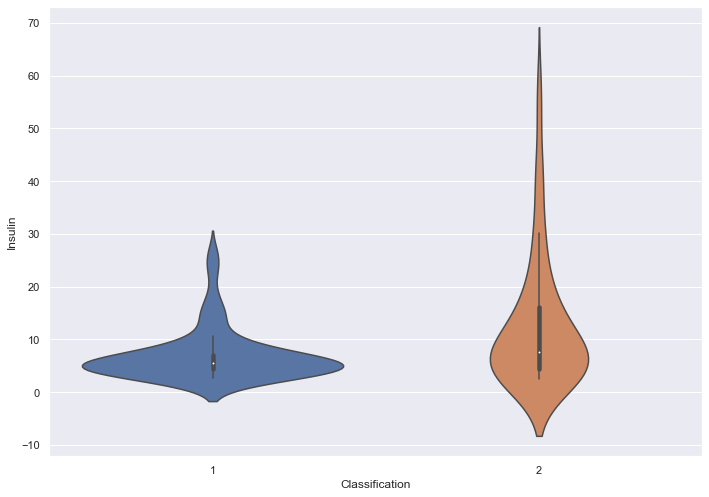

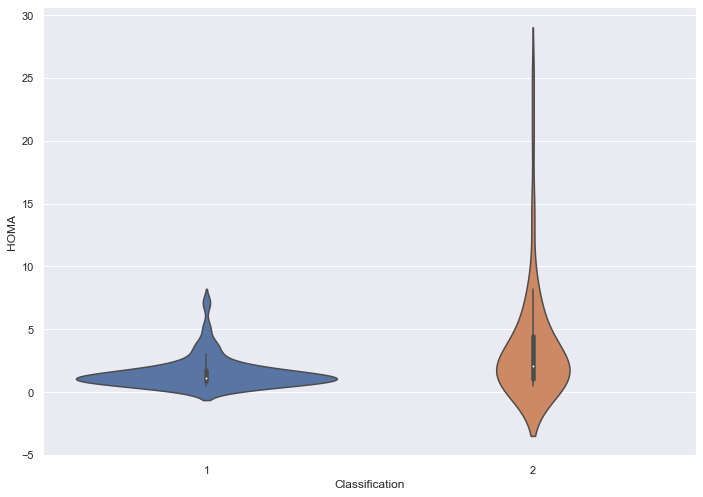

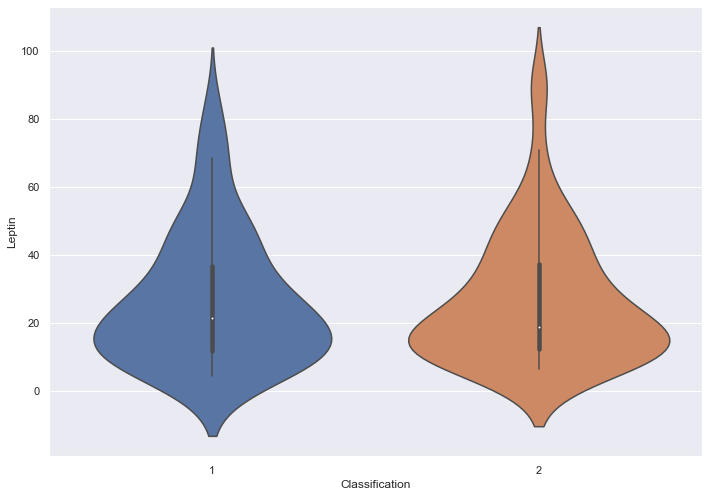

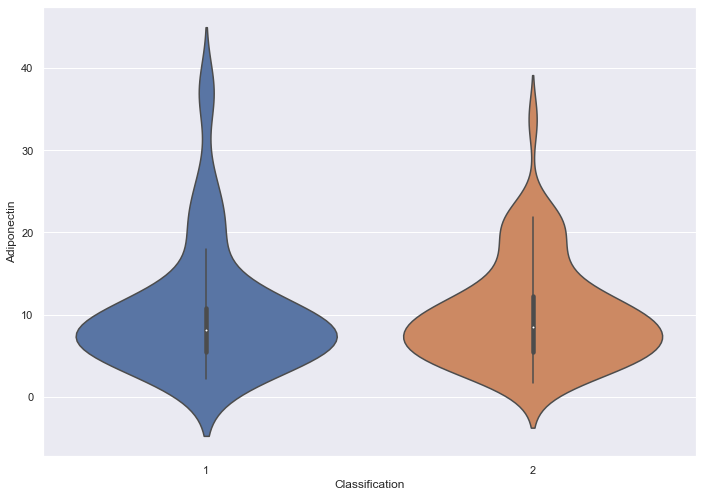

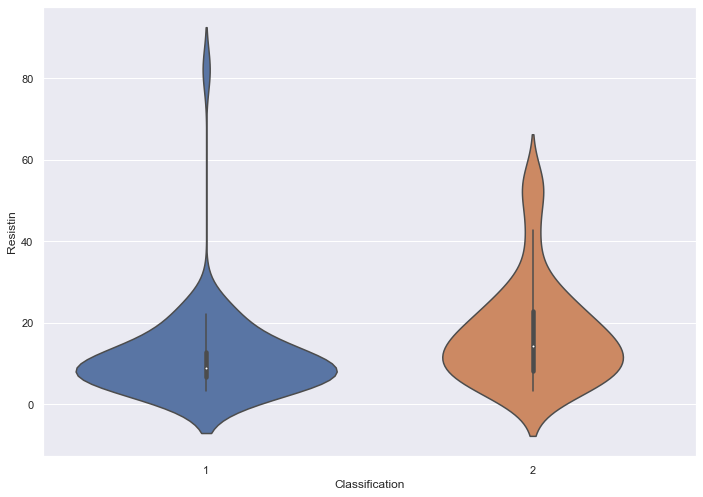

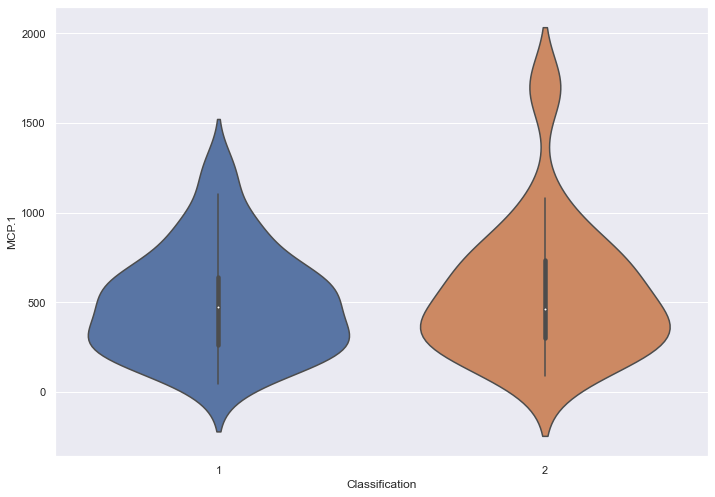

In [5]:
def violin_plots(x,y, data): 
    for i, col in enumerate(y):
        plt.figure(i)
        sns.set(rc = {'figure.figsize' : (11.7, 8.27)})
        ax = sns.violinplot(x=x, y = col, data = df)

y = df.columns[:-1]
x = df.columns[-1]

violin_plots(x,y,df)

Generate violin plots to give insights of the distribution of each feature for both classes 
- y is the features; everything but the last column; omit the last column / character 
- x is the target variable for this scenario; take the last column / character 

Note: 
- [:-1] means all elements in the sequence but the last 
- violin plots are used to observer the distribution of **numerical data** using density curves (aka kernal density estiminate (KDE))
    - box plots are overlaid to show additional information 

In [6]:
'''for col in df.columns: 
    print(f'{col} : {df[col].isnull().sum()}')'''

df.isnull().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

### Preprocessing 

In [7]:
t = df['Classification'].value_counts(ascending = False)
print(f'Prior to label encoding:\n{t}')
le = LabelEncoder()
df['Classification'] = le.fit_transform(df['Classification'])
t = df['Classification'].value_counts()
print(f'Prior to label encoding:\n{t}')

Prior to label encoding:
2    64
1    52
Name: Classification, dtype: int64
Prior to label encoding:
1    64
0    52
Name: Classification, dtype: int64


In [8]:
y = df['Classification'].values.reshape(-1,1)
X = df.drop(['Classification'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state= 42)

Dataset is relatively small so test_size will be small as well 
- 10% of the data will be used for testing; 90% of the data will be used for training 

### Baseline decision tree model 

/Users/William/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


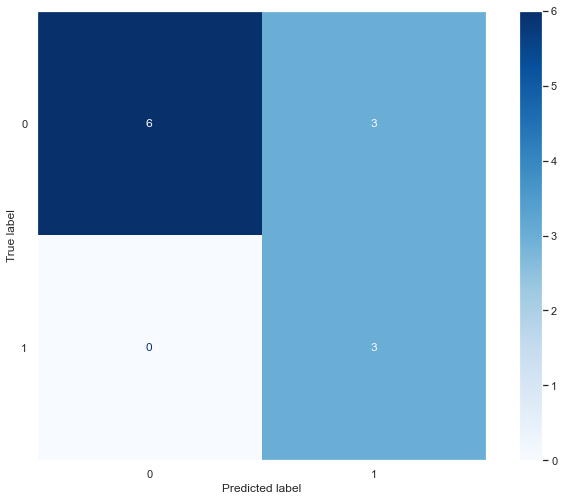

<Figure size 720x720 with 0 Axes>

In [9]:
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train.ravel())
#clf.fit(X_train, y_train)

plot_confusion_matrix(clf, X_test, y_test, cmap = plt.cm.Blues)
plt.grid(False)
plt.figure(figsize= (10,10))
plt.show()

Only three instances were misclassified 

[Text(0.4861111111111111, 0.9285714285714286, 'X[2] <= 91.5\ngini = 0.485\nsamples = 104\nvalue = [43, 61]'),
 Text(0.3055555555555556, 0.7857142857142857, 'X[0] <= 44.5\ngini = 0.454\nsamples = 43\nvalue = [28, 15]'),
 Text(0.25, 0.6428571428571429, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.3611111111111111, 0.6428571428571429, 'X[7] <= 14.227\ngini = 0.5\nsamples = 30\nvalue = [15, 15]'),
 Text(0.2222222222222222, 0.5, 'X[0] <= 46.5\ngini = 0.36\nsamples = 17\nvalue = [13, 4]'),
 Text(0.1111111111111111, 0.35714285714285715, 'X[0] <= 45.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.05555555555555555, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.16666666666666666, 0.21428571428571427, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.3333333333333333, 0.35714285714285715, 'X[7] <= 3.295\ngini = 0.245\nsamples = 14\nvalue = [12, 2]'),
 Text(0.2777777777777778, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.38

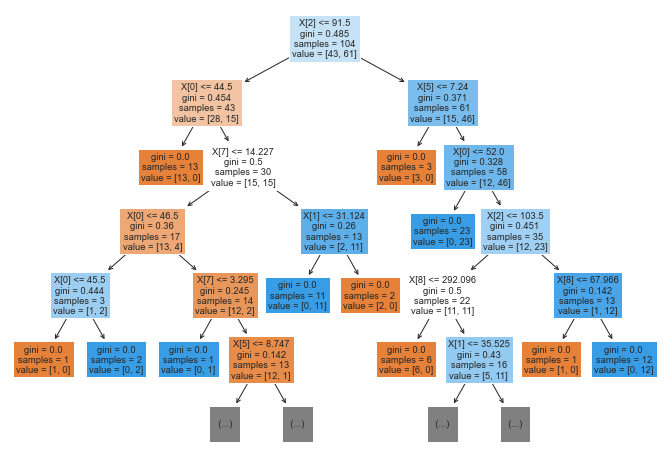

In [10]:
plot_tree(clf, max_depth= 5, filled = True)
#plt.figure(figsize=(12,12))

5 splits 

### Bagging

/Users/William/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


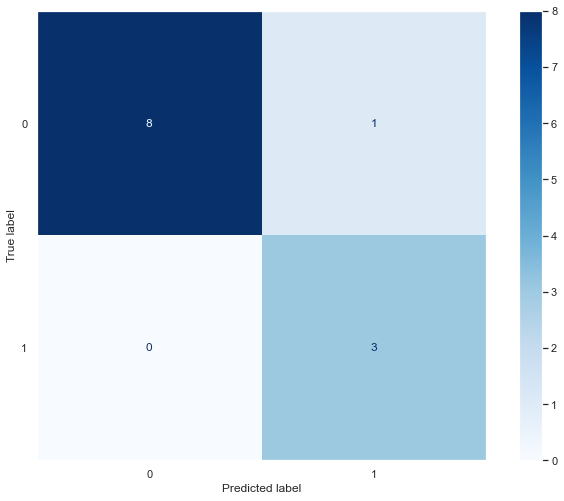

<Figure size 720x720 with 0 Axes>

In [11]:
bagging_clf = BaggingClassifier()

bagging_clf.fit(X_train, y_train.ravel())

plot_confusion_matrix(bagging_clf, X_test, y_test, cmap = plt.cm.Blues)
plt.grid(False)
plt.figure(figsize = (10,10))
plt.show()

Some improvement over the baseline 

### Random Forest Classifier 

/Users/William/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


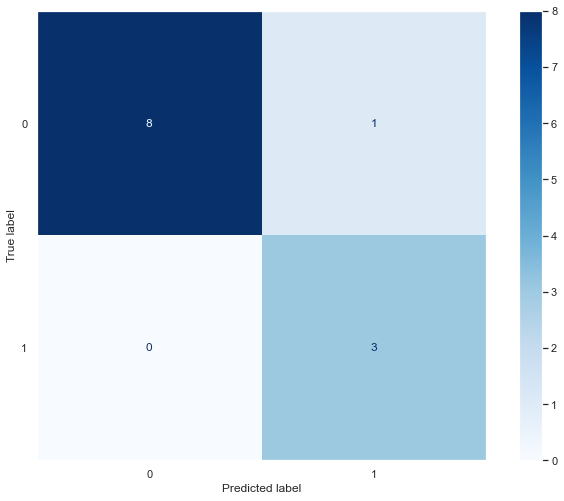

<Figure size 720x720 with 0 Axes>

In [12]:
random_clf = RandomForestClassifier(100)
## 100 trees 

random_clf.fit(X_train, y_train.ravel())

plot_confusion_matrix(bagging_clf, X_test, y_test, cmap = plt.cm.Blues)
plt.grid(False)
plt.figure(figsize = (10,10))
plt.show()

similar results as bagging; but this can vary due to small dataset 

### Boosting 

/Users/William/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


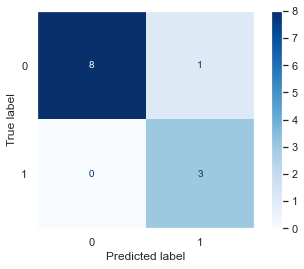

<Figure size 720x720 with 0 Axes>

In [15]:
boost_clf = GradientBoostingClassifier()

boost_clf.fit(X_train, y_train.ravel())

plot_confusion_matrix(boost_clf, X_test, y_test, cmap = plt.cm.Blues)
plt.grid(False)
plt.figure(figsize = (10,10))
plt.show()

just like the previous results, better than baseline but varies due to size of the dataset 